In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
#fetch data
data = pd.read_csv("Life_Expectancy_Data.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [3]:
data["Status"].value_counts()

Status
Developing    2426
Developed      512
Name: count, dtype: int64

In [4]:
data["Country"].value_counts()

Country
Afghanistan              16
Peru                     16
Nicaragua                16
Niger                    16
Nigeria                  16
                         ..
Niue                      1
San Marino                1
Nauru                     1
Saint Kitts and Nevis     1
Dominica                  1
Name: count, Length: 193, dtype: int64

In [5]:
data.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


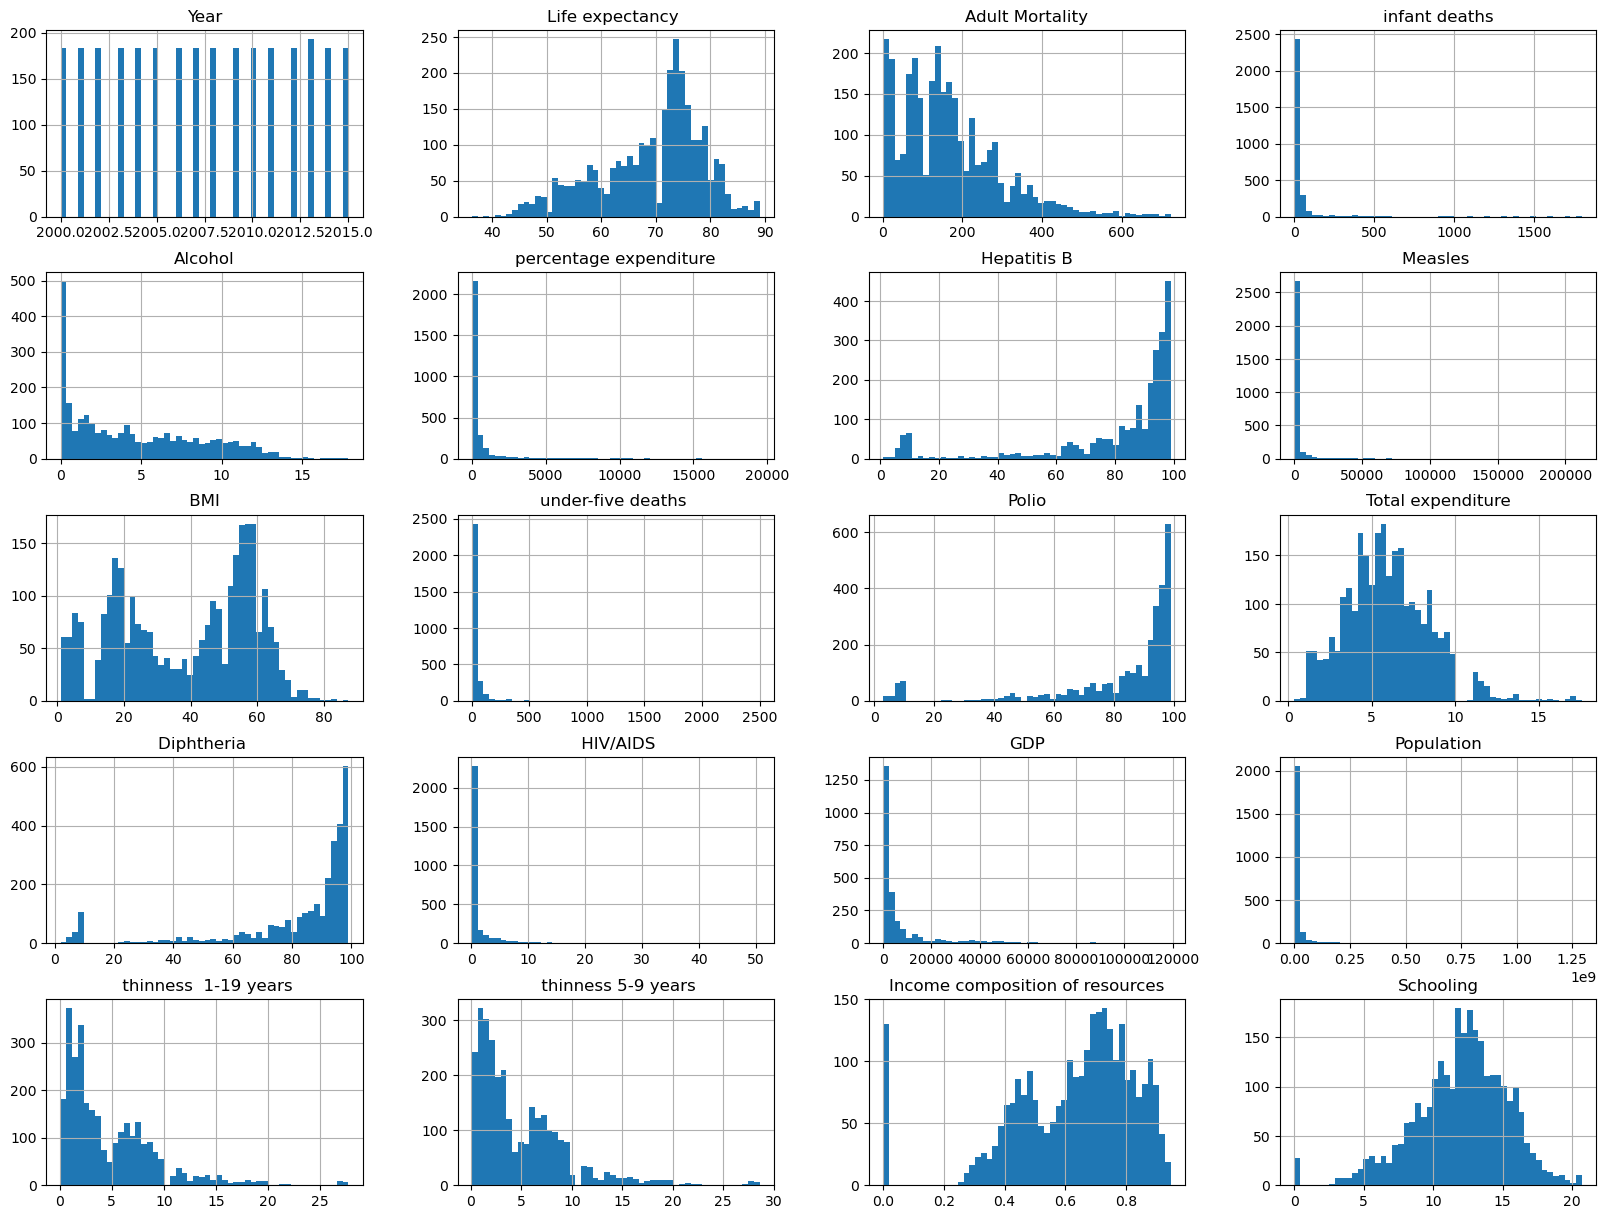

In [6]:
data.hist(bins=50, figsize=(20,15))
plt.show()

In [7]:
corr_matrix = data.corr(numeric_only=True)
corr_matrix["Life expectancy "].sort_values(ascending=False)

Life expectancy                    1.000000
Schooling                          0.751975
Income composition of resources    0.724776
 BMI                               0.567694
Diphtheria                         0.479495
Polio                              0.465556
GDP                                0.461455
Alcohol                            0.404877
percentage expenditure             0.381864
Hepatitis B                        0.256762
Total expenditure                  0.218086
Year                               0.170033
Population                        -0.021538
Measles                           -0.157586
infant deaths                     -0.196557
under-five deaths                 -0.222529
 thinness 5-9 years               -0.471584
 thinness  1-19 years             -0.477183
 HIV/AIDS                         -0.556556
Adult Mortality                   -0.696359
Name: Life expectancy , dtype: float64

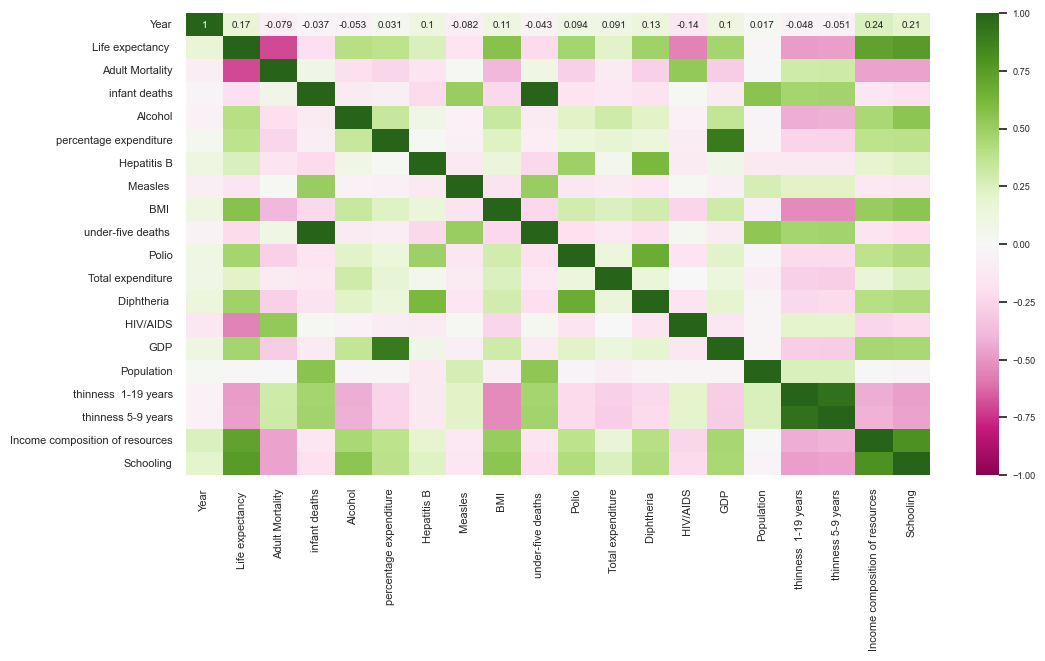

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(font_scale=0.6)
plt.figure(figsize=(12,6))
sns.heatmap(corr_matrix,annot=True, cmap="PiYG",vmax=1, vmin=-1)
plt.tick_params(axis='both', which='major', labelsize=8)

In [9]:
df = pd.DataFrame(data)
df.insert(0, "thinness", data[' thinness 5-9 years'] + data[' thinness  1-19 years'], True)

In [10]:
df.insert(0, "child deaths", data['under-five deaths '] + data['infant deaths'], True)

In [11]:
df_corr_matrix = df.corr(numeric_only=True)
df_corr_matrix["Life expectancy "].sort_values(ascending=False)

Life expectancy                    1.000000
Schooling                          0.751975
Income composition of resources    0.724776
 BMI                               0.567694
Diphtheria                         0.479495
Polio                              0.465556
GDP                                0.461455
Alcohol                            0.404877
percentage expenditure             0.381864
Hepatitis B                        0.256762
Total expenditure                  0.218086
Year                               0.170033
Population                        -0.021538
Measles                           -0.157586
infant deaths                     -0.196557
child deaths                      -0.211701
under-five deaths                 -0.222529
 thinness 5-9 years               -0.471584
 thinness  1-19 years             -0.477183
thinness                          -0.481764
 HIV/AIDS                         -0.556556
Adult Mortality                   -0.696359
Name: Life expectancy , dtype: f

In [12]:
df_corr_matrix

,child deaths,thinness,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
child deaths,1.000000,0.477122,-0.040631,-0.211701,0.087699,0.998880,-0.113843,-0.086975,-0.229233,0.505395,...,-0.181231,-0.129602,-0.187139,0.032653,-0.110624,0.550125,0.467293,0.472264,-0.155735,-0.202907
thinness,0.477122,1.000000,-0.050188,-0.481764,0.310483,0.475859,-0.429829,-0.256073,-0.124644,0.226395,...,-0.225682,-0.284976,-0.229628,0.208894,-0.293122,0.257093,0.984349,0.984963,-0.423227,-0.473396
Year,-0.040631,-0.050188,1.000000,0.170033,-0.079052,-0.037415,-0.052990,0.031400,0.104333,-0.082493,...,0.094158,0.090740,0.134337,-0.139741,0.101620,0.016969,-0.047876,-0.050929,0.243468,0.209400
Life expectancy,-0.211701,-0.481764,0.170033,1.000000,-0.696359,-0.196557,0.404877,0.381864,0.256762,-0.157586,...,0.465556,0.218086,0.479495,-0.556556,0.461455,-0.021538,-0.477183,-0.471584,0.724776,0.751975
Adult Mortality,0.087699,0.310483,-0.079052,-0.696359,1.000000,0.078756,-0.195848,-0.242860,-0.162476,0.031176,...,-0.274823,-0.115281,-0.275131,0.523821,-0.296049,-0.013647,0.302904,0.308457,-0.457626,-0.454612
infant deaths,0.998880,0.475859,-0.037415,-0.196557,0.078756,1.000000,-0.115638,-0.085612,-0.223566,0.501128,...,-0.170689,-0.128616,-0.175171,0.025231,-0.108427,0.556801,0.465711,0.471350,-0.145139,-0.193720
Alcohol,-0.113843,-0.429829,-0.052990,0.404877,-0.195848,-0.115638,1.000000,0.341285,0.087549,-0.051827,...,0.221734,0.296942,0.222020,-0.048845,0.354712,-0.035252,-0.428795,-0.417414,0.450040,0.547378
percentage expenditure,-0.086975,-0.256073,0.031400,0.381864,-0.242860,-0.085612,0.341285,1.000000,0.016274,-0.056596,...,0.147259,0.174420,0.143624,-0.097857,0.899373,-0.025662,-0.251369,-0.252905,0.381952,0.389687
Hepatitis B,-0.229233,-0.124644,0.104333,0.256762,-0.162476,-0.223566,0.087549,0.016274,1.000000,-0.120529,...,0.486171,0.058280,0.611495,-0.112675,0.083903,-0.123321,-0.120429,-0.124960,0.199549,0.231117
Measles,0.505395,0.226395,-0.082493,-0.157586,0.031176,0.501128,-0.051827,-0.056596,-0.120529,1.000000,...,-0.136166,-0.106241,-0.141882,0.030899,-0.076466,0.265966,0.224808,0.221072,-0.129568,-0.137225


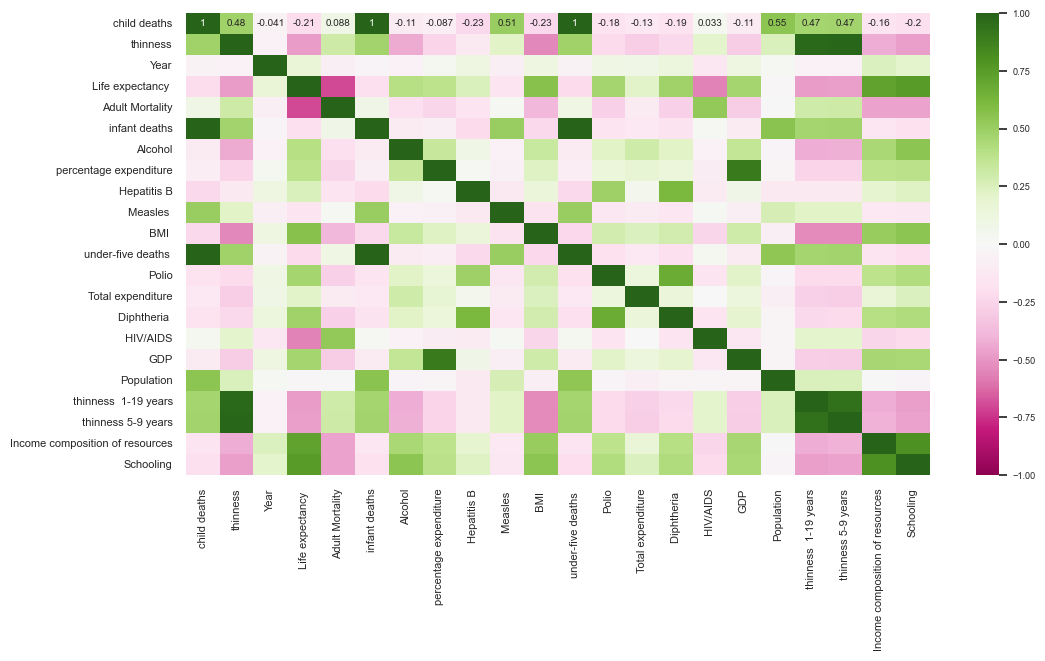

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(font_scale=0.6)
plt.figure(figsize=(12,6))
sns.heatmap(df_corr_matrix,annot=True, cmap="PiYG",vmax=1, vmin=-1)
plt.tick_params(axis='both', which='major', labelsize=8)

In [14]:
dataset = data.dropna(subset=['Life expectancy '])
dataset.insert(0, "LE class", np.floor(dataset['Life expectancy '] / 10).astype(int))

In [15]:
from sklearn.model_selection import train_test_split
X = dataset[[cl for cl in dataset.columns if cl != 'Life expectancy ']]
y = dataset['Life expectancy ']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
y_train_log = X_train['LE class']
y_test_log = X_test['LE class']
X_train = X_train.drop(columns='LE class')
X_test = X_test.drop(columns='LE class')

# Transformation Pipelines

In [17]:
from sklearn.base import BaseEstimator, TransformerMixin
class ReplaceNullValue(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        for attr in X.columns:
            if X[attr].dtype == 'O':
                continue
            else:
                for ctr in X['Country'].unique():
                    ls = X.loc[(pd.notnull(X[attr]) & (X.Country == ctr)), [attr]]
                    mean = 0 if len(ls) == 0 else np.average(ls)
                    X.loc[(np.isnan(X[attr]) & (X.Country == ctr)), [attr]] = int(mean) if X[attr].dtype == 'int64' else mean
        return X

In [18]:
#code from lecture slide
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [19]:
#custom transformer
from sklearn.base import BaseEstimator, TransformerMixin

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_thinness = True):
        self.add_thinness = add_thinness
    def fit(self, X, y=None):
        return self # nothing else to do
    def transform(self, X, y=None):
        if self.add_thinness:
            thinness = X[:, 0] + X[:, 1]
            X = np.delete(X, [0, 1], axis=1)
            return np.c_[X, thinness]
        else:
            return np.c_[X]

In [20]:
num_attributes = [' thinness  1-19 years', ' thinness 5-9 years','Year', 'Adult Mortality', 
       'Alcohol', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'percentage expenditure', 'Income composition of resources', 'Schooling'] # 'GDP', 'infant deaths', 'Income composition of resources', 
cat_attributes = ['Country', 'Status']

In [21]:
#transformation pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline([
        # ('selector', DataFrameSelector(num_attributes)),
        ('imputer', ReplaceNullValue()),
        ('selector', DataFrameSelector(num_attributes)),
        ('add_attr', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])
cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(cat_attributes)),
        ('label_encoder', OneHotEncoder()),
    ])
full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])

X_train = full_pipeline.fit_transform(X_train)
X_train

<2342x200 sparse matrix of type '<class 'numpy.float64'>'
	with 39814 stored elements in Compressed Sparse Row format>

# Training model

In [22]:
from collections import defaultdict 
train_time = defaultdict(int)
predict_time = defaultdict(int)

In [23]:
#1. linear regression
from sklearn.linear_model import LinearRegression
t0 = time.time()
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
train_time['lin'] = time.time() - t0

In [24]:
#2. logistic regression
from sklearn.linear_model import LogisticRegression
t0 = time.time()
log_reg = LogisticRegression(multi_class='multinomial',solver='saga',max_iter=1000)
log_reg.fit(X_train, y_train_log)
train_time['log'] = time.time() - t0

In [25]:
#3. polynominal regression
from sklearn.preprocessing import PolynomialFeatures
t0 = time.time()
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(X_train)
poly_reg_model = LinearRegression()
poly_reg_model.fit(poly_features, y_train)
train_time['poly'] = time.time() - t0

In [26]:
from sklearn.model_selection import GridSearchCV

In [27]:
#4. svm regression
from sklearn.svm import SVR
t0 = time.time()
svm_param_grid = [
        {'kernel': ["linear", "poly", "rbf"], 
        'degree': [2, 3], 
        'C': [0.01, 0.1, 1], 
        'epsilon': [0.1, 0.2, 0.3]},
        ]
svm_reg = SVR()
svm_cv = GridSearchCV(svm_reg, svm_param_grid, cv=10, scoring='neg_mean_squared_error')
svm_cv.fit(X_train, y_train)
train_time['svm'] = time.time() - t0

In [28]:
#5. decision tree/random forest
from sklearn.tree import DecisionTreeRegressor
t0 = time.time()
dt_param_grid = [
        {'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]},
    ]
tree_reg = DecisionTreeRegressor()
tree_cv = GridSearchCV(tree_reg, dt_param_grid, cv=10, scoring='neg_mean_squared_error')
tree_cv.fit(X_train, y_train)
train_time['dtree'] = time.time() - t0

In [29]:
#7. artificial neural network
from sklearn.neural_network import MLPRegressor
t0 = time.time()
mlp_param_grid = [
        {
            'hidden_layer_sizes': [(150, 150),(150, 150, 150)],
            'activation': ['relu','tanh'],
            'max_iter': [400, 500],
            'momentum': [0.7, 0.8, 0.9]
        },
    ]
mlp_reg = MLPRegressor(random_state=1, warm_start=True, early_stopping=True,learning_rate='adaptive')
mlp_cv = GridSearchCV(mlp_reg, mlp_param_grid, cv=5, scoring='neg_mean_squared_error')
mlp_cv.fit(X_train, y_train)
train_time['mlp'] = time.time() - t0

# Ensembling learning

In [30]:
from sklearn.ensemble import RandomForestRegressor
t0 = time.time()
rt_param_grid = [
        {
            'max_depth': [None, 10, 20, 30],
            'n_estimators': [3, 10, 30], 
            'max_features': [2, 4, 6, 8]
        },
    ]
forest_reg = RandomForestRegressor()
forest_cv = GridSearchCV(forest_reg, rt_param_grid, cv=5, scoring='neg_mean_squared_error')
forest_cv.fit(X_train, y_train)
train_time['forest'] = time.time() - t0

In [31]:
from sklearn.ensemble import GradientBoostingRegressor
t0 = time.time()
gbr_param_grid = [
        {
            'max_depth': [None, 10, 20, 30],
            'n_estimators': [3, 10, 30], 
            'max_features': [2, 4, 6, 8]
        },
    ]
grad_boosting_reg = GradientBoostingRegressor()
grad_boosting_cv = GridSearchCV(grad_boosting_reg, gbr_param_grid, cv=5, scoring='neg_mean_squared_error')
grad_boosting_cv.fit(X_train, y_train)
train_time['gbr'] = time.time() - t0

In [32]:
from sklearn.ensemble import VotingRegressor
t0 = time.time()
voting_reg = VotingRegressor(estimators=[
                                ('lin', lin_reg), 
                                ('poly', poly_reg_model), 
                                ('svc', svm_cv), 
                                ('dt', tree_cv), 
                                ('mlp', mlp_cv),
                                ('fr', forest_cv),
                                ('gbr', grad_boosting_cv),
                            ])
voting_reg.fit(X_train, y_train)
train_time['voting'] = time.time() - t0

In [33]:
from sklearn.ensemble import VotingRegressor
t0 = time.time()
voting_no_poly_reg = VotingRegressor(estimators=[
                                ('lin', lin_reg), 
                                ('svc', svm_cv), 
                                ('dt', tree_cv), 
                                ('mlp', mlp_cv),
                                ('fr', forest_cv),
                                ('gbr', grad_boosting_cv),
                            ])
voting_no_poly_reg.fit(X_train, y_train)
train_time['voting_no_poly'] = time.time() - t0

In [34]:
from sklearn.ensemble import VotingRegressor
t0 = time.time()
voting_no_tree_reg = VotingRegressor(estimators=[
                                ('lin', lin_reg), 
                                ('svc', svm_cv),  
                                ('mlp', mlp_cv),
                                ('fr', forest_cv),
                                ('gbr', grad_boosting_cv),
                            ])
voting_no_tree_reg.fit(X_train, y_train)
train_time['voting_no_tree'] = time.time() - t0

# Evaluation

In [35]:
X_test = full_pipeline.transform(X_test)
X_test_poly = poly.transform(X_test)

In [36]:
t0 = time.time()
y_pred_lin = lin_reg.predict(X_test)
predict_time['lin'] = time.time() - t0

t0 = time.time()
y_pred_poly = poly_reg_model.predict(X_test_poly)
predict_time['poly'] = time.time() - t0

t0 = time.time()
y_pred_svm = svm_cv.predict(X_test)
predict_time['svm'] = time.time() - t0

t0 = time.time()
y_pred_tree = tree_cv.predict(X_test)
predict_time['dtree'] = time.time() - t0

t0 = time.time()
y_pred_mlp = mlp_cv.predict(X_test)
predict_time['mlp'] = time.time() - t0

t0 = time.time()
y_pred_forest = forest_cv.predict(X_test)
predict_time['forest'] = time.time() - t0

t0 = time.time()
y_pred_grad = grad_boosting_cv.predict(X_test)
predict_time['gbr'] = time.time() - t0

t0 = time.time()
y_pred_voting = voting_reg.predict(X_test)
predict_time['voting'] = time.time() - t0

t0 = time.time()
y_pred_log = log_reg.predict(X_test)
predict_time['log'] = time.time() - t0

In [37]:
t0 = time.time()
y_pred_voting_no_poly = voting_no_poly_reg.predict(X_test)
predict_time['voting_no_poly'] = time.time() - t0


In [38]:
t0 = time.time()
y_pred_voting_no_tree = voting_no_tree_reg.predict(X_test)
predict_time['voting_no_tree'] = time.time() - t0


In [39]:
#performance measures
from sklearn.metrics import mean_squared_error
rmse = defaultdict(int)
def rmse_score(y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    return rmse

In [40]:
rmse["Linear Regression"] = rmse_score(y_test, y_pred_lin)
rmse["Polynomial regression"] = rmse_score(y_test, y_pred_poly)
rmse["SVM regression"] = rmse_score(y_test, y_pred_svm)
rmse["Decision trees"] = rmse_score(y_test, y_pred_tree)
rmse["Multilayer Perceptron"] = rmse_score(y_test, y_pred_mlp)
rmse["Random forests"] = rmse_score(y_test, y_pred_forest)
rmse["Gradient Boosting Regressor"] = rmse_score(y_test, y_pred_grad)
rmse["Voting Regressor"] = rmse_score(y_test, y_pred_voting)
rmse["Voting Regressor (no poly)"] = rmse_score(y_test, y_pred_voting_no_poly)
rmse["Voting Regressor (no tree)"] = rmse_score(y_test, y_pred_voting_no_tree)

In [41]:
rmse_df = pd.DataFrame(data=rmse.values(),index=rmse.keys(),columns=['RMSE'])

In [42]:
# Results before add thinness attibute
print(rmse_df)

                                  RMSE
Linear Regression             1.951160
Polynomial regression        11.111537
SVM regression                2.380698
Decision trees                2.227543
Multilayer Perceptron         1.705519
Random forests                1.858026
Gradient Boosting Regressor   1.914400
Voting Regressor              1.627180
Voting Regressor (no poly)    1.621223
Voting Regressor (no tree)    1.709779


In [43]:
from sklearn.metrics import accuracy_score
print('Logistic Regression accurary: ',accuracy_score(y_test_log,y_pred_log))

Logistic Regression accurary:  0.9044368600682594


In [44]:
train_time_df = pd.DataFrame(data=train_time.values(),index=train_time.keys(),columns=['Train (sec)'])

In [45]:
predict_time_df = pd.DataFrame(data=predict_time.values(),index=predict_time.keys(),columns=['Predict (sec)'])

In [46]:
print(pd.concat([train_time_df, predict_time_df], axis=1, join='inner'))

                Train (sec)  Predict (sec)
lin                0.009011       0.000000
log                0.625016       0.000000
poly               6.415018       0.000000
svm               99.088514       0.031400
dtree             15.772310       0.001000
mlp              980.952636       0.004999
forest            25.256746       0.006001
gbr               34.339192       0.004959
voting          1155.702052       0.045071
voting_no_poly  1174.743445       0.049539
voting_no_tree  1172.228133       0.055995


In [47]:
from sklearn.model_selection import cross_val_score
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
def cv_score(model, name, X, y):
    print(name)
    scores = cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=10)
    display_scores(np.sqrt(-scores))
    print('\n')

In [48]:
cv_score(voting_no_poly_reg, "Voting Regressor without Poly: ", X_train, y_train)

Voting Regressor without Poly: 


C:\Users\chauc\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\chauc\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\chauc\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\chauc\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\chauc\anaconda3\Lib\site-packages\sklearn\neural_network\_multi

Scores: [2.26621813 1.61749033 1.71914255 2.23591355 1.65210344 1.81992886
 1.78892751 1.70018112 1.46842515 1.88292351]
Mean: 1.8151254163235042
Standard deviation: 0.24374475187944253


